# Task 2. Text Classification

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
import string 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import tkinter as tk
from tkinter import ttk, font
from tkinter import messagebox

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv('test.csv')
data

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


Data source: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset/code

In [4]:
first_column_name = data.columns[0]
first_column = data[first_column_name]
data = data.drop(columns=[first_column_name])
data[first_column_name] = first_column
data

,Title,Description,Class Index
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,3
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",4
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,4
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,4
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,4
...,...,...,...
7595,Around the world,Ukrainian presidential candidate Viktor Yushch...,1
7596,Void is filled with Clement,With the supply of attractive pitching options...,2
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,2
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,3


In [5]:
data = data[data['Class Index'] != 1]
data
# 2- Sports, 3- Business, 4- Science

,Title,Description,Class Index
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,3
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",4
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,4
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,4
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,4
...,...,...,...
7593,Mortaza strikes to lead superb Bangladesh rally,Paceman Mashrafe Mortaza claimed two prize sca...,2
7596,Void is filled with Clement,With the supply of attractive pitching options...,2
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,2
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,3


In [6]:
columns_to_replace = ['Class Index']
new_values = {2: 1, 3: 2, 4: 3}
for column in columns_to_replace:
    data.loc[:, column] = data.loc[:, column].replace(new_values)
data

C:\Users\alexa\AppData\Local\Temp\ipykernel_12884\511806019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, column] = data.loc[:, column].replace(new_values)


,Title,Description,Class Index
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,2
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",3
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,3
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,3
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,3
...,...,...,...
7593,Mortaza strikes to lead superb Bangladesh rally,Paceman Mashrafe Mortaza claimed two prize sca...,1
7596,Void is filled with Clement,With the supply of attractive pitching options...,1
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,1
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,2


## Exploratory Data Analysis

#### Class Imbalance

In [7]:
labels = {1:'Sports',2:'Business',3:'Science'}
data['Labels'] = data['Class Index'].map(labels)
data

C:\Users\alexa\AppData\Local\Temp\ipykernel_12884\2875423570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Labels'] = data['Class Index'].map(labels)


,Title,Description,Class Index,Labels
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,2,Business
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",3,Science
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,3,Science
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,3,Science
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,3,Science
...,...,...,...,...
7593,Mortaza strikes to lead superb Bangladesh rally,Paceman Mashrafe Mortaza claimed two prize sca...,1,Sports
7596,Void is filled with Clement,With the supply of attractive pitching options...,1,Sports
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,1,Sports
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,2,Business


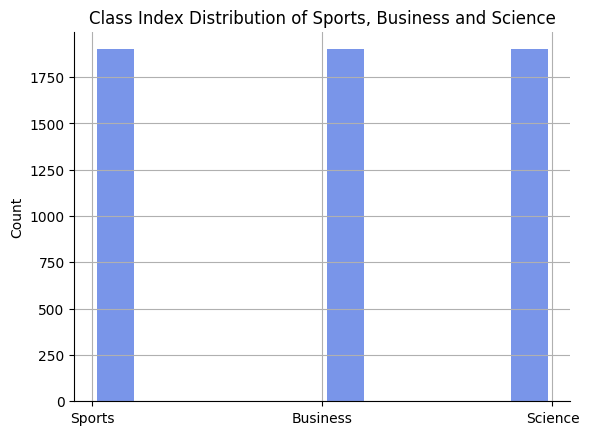

In [45]:
plt.hist(data['Class Index'], color='royalblue', alpha=0.7, rwidth=0.8)
plt.ylabel('Count')
plt.title('Class Index Distribution of Sports, Business and Science')
plt.grid()
plt.xticks([1, 2, 3], ['Sports', 'Business', 'Science'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [46]:
data.Labels.value_counts()

Business    1900
Science     1900
Sports      1900
Name: Labels, dtype: int64

In [47]:
data.isnull().sum()

Title          0
Description    0
Class Index    0
Labels         0
dtype: int64

### Text Preprocessing

##### Expanding contractions, removing of URLs, html tags, punctuations, stopwords and performing lemmatizing

In [8]:
data['Description'] = data['Description'].apply(lambda x: str(x).lower()
                                        .replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                        .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                        .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                        .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                        .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                        .replace("'ll"," will").replace("i'm","i am").replace("n't", " not"))

data['Title'] = data['Title'].apply(lambda x: str(x).lower()
                                .replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not"))

data['Description'] = data['Description'].apply(lambda x: re.compile(r'https?://\S+|www\.\S+').sub(r'', str(x)))
data['Title'] = data['Title'].apply(lambda x: re.compile(r'https?://\S+|www\.\S+').sub(r'', str(x)))

data['Description'] = data['Description'].apply(lambda x: re.compile('<.*?>').sub(r'', str(x)))
data['Title'] = data['Title'].apply(lambda x: re.compile('<.*?>').sub(r'', str(x)))


C:\Users\alexa\AppData\Local\Temp\ipykernel_12884\2005776356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].apply(lambda x: str(x).lower()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12884\2005776356.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].apply(lambda x: str(x).lower()
C:\Users\alexa\AppData\Local\Temp\ipykernel_12884\2005776356.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [9]:
lemmatizer = WordNetLemmatizer()
sw = nltk.corpus.stopwords.words('english')
columns_to_preprocess = ['Title', 'Description']

for column in columns_to_preprocess:
    cells = data[column].tolist()
    ready_cells = []
    for cell in cells:
        tokens = word_tokenize(str(cell))
        tmp = ""
        for i in tokens:
            if i not in sw:
                tmp += lemmatizer.lemmatize(i) + " "
                for j in string.punctuation:
                    tmp = tmp.replace(j, '')
        ready_cells.append(tmp)
    data[column] = ready_cells

C:\Users\alexa\AppData\Local\Temp\ipykernel_12884\634062727.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = ready_cells


In [10]:
data

,Title,Description,Class Index,Labels
0,fear n pension talk,union representing worker turner newall say di...,2,Business
1,race second private team set launch date huma...,spacecom toronto canada secondteam rocketee...,3,Science
2,ky company win grant study peptide ap,ap company founded chemistry researcher unive...,3,Science
3,prediction unit help forecast wildfire ap,ap barely dawn mike fitzpatrick start shift b...,3,Science
4,calif aim limit farmrelated smog ap,ap southern california s smogfighting agency ...,3,Science
...,...,...,...,...
7593,mortaza strike lead superb bangladesh rally,paceman mashrafe mortaza claimed two prize sca...,1,Sports
7596,void filled clement,supply attractive pitching option dwindling da...,1,Sports
7597,martinez leaf bitter,like roger clemens almost exactly eight year e...,1,Sports
7598,5 arthritis patient singapore take bextra cele...,singapore doctor united state warned painkill...,2,Business


### Vectorizing

In [11]:
vectorized_data = data['Title'] + ' ' + data['Description'] 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(vectorized_data)
print(X.todense())
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 11310)	0.3092239952114831
  (0, 6838)	0.1707517592599755
  (0, 7020)	0.1755064471492188
  (0, 12584)	0.23716285620408395
  (0, 16462)	0.3238886384375484
  (0, 5221)	0.27857938343030797
  (0, 14970)	0.14327455583059642
  (0, 11765)	0.3092239952114831
  (0, 17709)	0.28415462203288366
  (0, 18892)	0.20402294747807775
  (0, 14309)	0.26567935653294283
  (0, 17938)	0.19002194599748884
  (0, 16876)	0.3865818159161716
  (0, 12758)	0.23716285620408395
  (0, 6825)	0.23401587567568494
  (1, 14622)	0.15980538917176557
  (1, 10684)	0.19724983355668632
  (1, 7032)	0.21973261959249749
  (1, 1649)	0.10613088702591976
  (1, 12100)	0.1672223758645558
  (1, 7134)	0.14175354396454898
  (1, 16008)	0.12500290443114617
  (1, 16552)	0.2027250485129776
  (1, 7491)	0.21973261959249749
  (1, 7276)	0.21973261959249749
  :	:
  (5698, 18488)	0.158717972736

### Naive Bayes 


In [12]:
#Splitting the data
y= data['Class Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the data
model = MultinomialNB()
model.fit(X_train, y_train)

#Making predictions and Accuracy report
predictions=model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('Accuracy:', accuracy)

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       409
           2       0.91      0.88      0.90       382
           3       0.87      0.88      0.87       349

    accuracy                           0.92      1140
   macro avg       0.91      0.91      0.91      1140
weighted avg       0.92      0.92      0.92      1140

Accuracy: 0.9157894736842105


### Graphical User Interface

In [13]:
def text_classification():
    ''' A function that takes an input text and classifies it as Sports, Business or Science.'''
    input_text =text_input.get("1.0", "end-1c")  
    vectorized_text =vectorizer.transform([input_text])
    predicted_text=model.predict(vectorized_text)
    class_mapping = {1:'Sports', 2:'Business', 3:'Science'}
    class_prediction= class_mapping[predicted_text[0]]
    messagebox.showinfo("Text Classification Result", f"Predicted Class: {class_prediction}")

window= tk.Tk()
window.title("Text Classification")
style =ttk.Style()
style.theme_use('xpnative')
label = tk.Label(window, text="Enter your text here:",
                              background= 'steel blue',
                              foreground ='white',
                              font=('Georgia',24,'bold'))
label.pack()
text_input=tk.Text(window, height=20, width=70)
text_input.config(font=("Georgia",12), bg="light cyan", fg="black")
text_input.pack()
window.iconbitmap('icon.ico')
button_for_classification = ttk.Button(window,text="Classify",command=text_classification)
button_for_classification.pack()
window.mainloop()